# Level 5 Data Engineer Higher Apprenticeship
# Module 6 Topic 3 - APIs

## Introduction
In this notebook, we'll learn how to interact with a public REST API using Python. We'll focus on retrieving food hygiene data from the UK Food Standards Agency API, and visualising it using matplotlib.

### Visualising Food Hygiene Data
In this cell, we use matplotlib to display information returned from the API visually. This helps us quickly understand the distribution of hygiene ratings or other relevant metrics.

In [1]:
# Import necessary libraries
import requests  # for making HTTP requests to APIs
import json      # for working with JSON data
import matplotlib.pyplot as plt  # for plotting graphs

### Set up base URL and headers
These constants define the API's base URL and endpoints, as well as headers to specify API version and response type.

In [2]:
# Constants
BASE_URL = "https://api.ratings.food.gov.uk"
AUTHORITIES_ENDPOINT = "/Authorities"  # to get local authorities
ESTABLISHMENTS_ENDPOINT = "/Establishments"  # to get food establishment data
HEADERS = {'x-api-version': '2', 'Accept': 'application/json'}

In [3]:
def fetch_data(url, params=None):
    """Fetch data from the API using specified URL and parameters."""
    response = requests.get(url, headers=HEADERS, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to fetch data: {response.status_code} - {response.text}")

In [4]:
# Fetch and display authority data
def get_authorities():
    url = f"{BASE_URL}{AUTHORITIES_ENDPOINT}"
    data = fetch_data(url)
    return data['authorities']

In [5]:
# Visualize the number of establishments per authority
def plot_authorities(authorities):
    names = [auth['Name'] for auth in authorities]
    counts = [auth['EstablishmentCount'] for auth in authorities]

    plt.figure(figsize=(10, 8))
    plt.barh(names, counts, color='skyblue')
    plt.xlabel('Number of Establishments')
    plt.ylabel('Local Authority')
    plt.title('Number of Food Establishments per Local Authority')
    plt.gca().invert_yaxis()  # Invert y-axis to show the largest at the top
    plt.show()

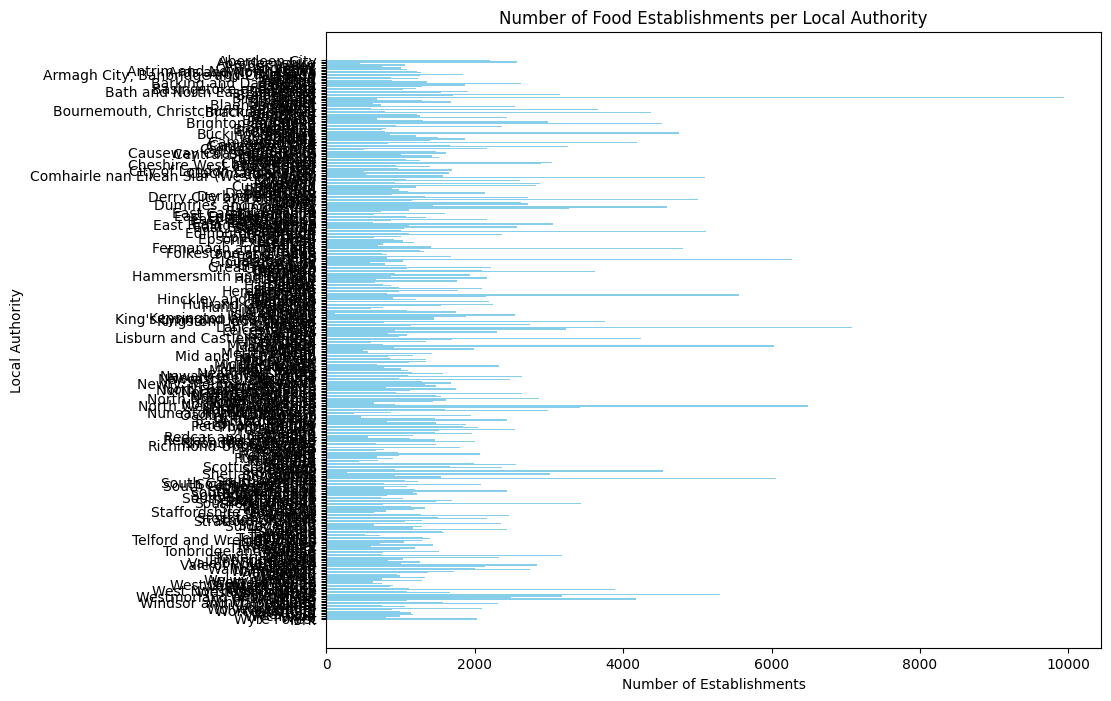

In [6]:
authorities = get_authorities()
plot_authorities(authorities)

In [7]:
# Function to get localAuthorityId for a place in England
def get_authority_id(authority_name):
    authorities = fetch_data(f"{BASE_URL}{AUTHORITIES_ENDPOINT}")['authorities']
    for authority in authorities:
        if authority['Name'].lower() == authority_name.lower():
            return authority['LocalAuthorityId']
    raise ValueError(f"Authority not found: {authority_name}")

In [8]:
# Fetch establishments data by localAuthorityId
def fetch_establishments(local_authority_id):
    params = {'localAuthorityId': local_authority_id}
    return fetch_data(f"{BASE_URL}{ESTABLISHMENTS_ENDPOINT}", params)

In [9]:
# Fetching localAuthorityId for Southampton
southampton_id = get_authority_id("Southampton")
establishments = fetch_establishments(southampton_id)

In [10]:
# Aggregate ratings for establishments
def aggregate_ratings(establishments):
    rating_distribution = {}
    for est in establishments['establishments']:
        rating = est['RatingValue']
        if rating not in rating_distribution:
            rating_distribution[rating] = 0
        rating_distribution[rating] += 1
    return rating_distribution

In [11]:
# Visualize the distribution of food hygiene ratings
def plot_rating_distribution(distribution, title):
    ratings = list(distribution.keys())
    counts = [distribution[rating] for rating in ratings]

    plt.figure(figsize=(10, 6))
    plt.bar(ratings, counts, color='purple')
    plt.xlabel('Ratings')
    plt.ylabel('Number of Establishments')
    plt.title(title)
    plt.show()

In [12]:
# Find and report the worst-rated establishments
def report_worst_establishments(establishments):
    worst = [est for est in establishments['establishments'] if est['RatingValue'] == '0']
    print("Worst Rated Establishments:")
    for est in worst:
        print(f"{est['BusinessName']} - Address: {est['AddressLine1']}, {est['AddressLine2']}")


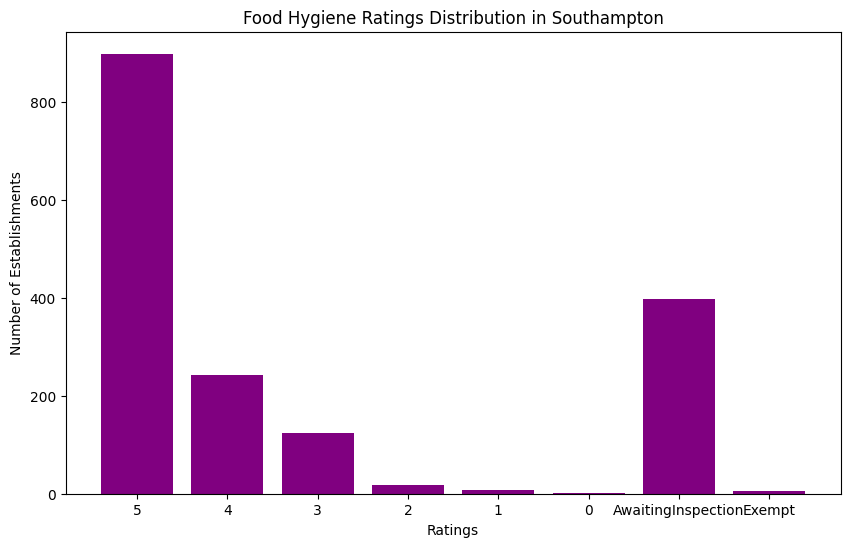

Worst Rated Establishments:
Balti House - Address: 36 Windrush Road, Southampton


In [13]:
    ratings = aggregate_ratings(establishments)
    plot_rating_distribution(ratings, "Food Hygiene Ratings Distribution in Southampton")
    report_worst_establishments(establishments)

## 🚀 Practice Activity
Now it's your turn!

Use the API to retrieve food establishment data from a different local authority.
1. Modify the code to find a different `LocalAuthorityId` (e.g. Manchester).
2. Print out the names of the first 10 establishments.
3. Count the number of each hygene rating in the authority.

*Hint: You can reuse and modify code from earlier in this notebook.*

## ✅ Sample Answer
Below is a sample solution to the practice activity. Learners should compare this with their own code, and discuss how they approached the problem. Encourage learners to explore how they might adapt this further—for example, by querying different locations or plotting additional metrics.

In [14]:
# 🔍 Answer Example: Retrieve establishments for Manchester (LocalAuthorityId = 197)
manchester_id = get_authority_id("Manchester")
establishments = fetch_establishments(manchester_id)
# Print the first 10 establishments in Manchester
for est in establishments['establishments'][:10]:
    print(est['BusinessName'])
establishment_rating = {}
# Count the number of establishments for each rating
for est in establishments['establishments']:
    rating = est['RatingValue']
    if rating not in establishment_rating:
        establishment_rating[rating] = 0
    establishment_rating[rating] += 1
# Print the number of establishments for each rating
for rating in establishment_rating.keys():
    print(f"Rating: {rating}, Count: {establishment_rating[rating]:,}")

(FOOD FACTORY) burgers and fries
10 Tib Lane
14Forty
19 Cafe Bar
20 Stories
200 Degrees Coffee Shop
2205
2Saucy Ltd
30 Grams Ltd
4 OF US
Rating: 5, Count: 3,523
Rating: 4, Count: 860
Rating: 3, Count: 394
Rating: 2, Count: 98
Rating: 1, Count: 125


## 🛠 Using `try` and `except` with API Requests
When working with APIs, it's important to handle errors gracefully. The server might be down, the request might time out, or the user might supply incorrect parameters. This section demonstrates how to use `try` and `except` to catch and handle such issues.

**Common issues we want to catch include:**
- Connection errors
- Invalid JSON responses
- Missing data fields

Using `try/except` allows us to write code that won't crash unexpectedly, and can help us provide more helpful error messages.

In [15]:
# Example: Safe API call with error handling
try:
    response = requests.get(BASE_URL + AUTHORITIES_ENDPOINT, headers=HEADERS, timeout=5)
    response.raise_for_status()  # Raises HTTPError for bad responses (4xx or 5xx)
    data = response.json()
    print("Successfully retrieved data for", len(data['authorities']), "authorities.")
except requests.exceptions.HTTPError as http_err:
    print("HTTP error occurred:", http_err)
except requests.exceptions.ConnectionError:
    print("Connection error. Please check your internet or the API URL.")
except requests.exceptions.Timeout:
    print("The request timed out.")
except ValueError:
    print("Response content is not valid JSON.")
except Exception as err:
    print("An unexpected error occurred:", err)

Successfully retrieved data for 363 authorities.


### 🧠 Try It Yourself
**Task:** Update the previous code you wrote to include `try` and `except` blocks.

1. Make an API request to retrieve food establishments for a given Local Authority.
2. Wrap your request and parsing code in `try/except` blocks.
3. Add error messages for:
   - HTTP errors (e.g. 404 or 500)
   - Connection issues
   - Timeout errors
   - Missing data in the response

*Bonus:* Try running the code with an invalid authority ID to trigger your error handling!